<a href="https://colab.research.google.com/github/RAJUMATAM/-Blinkit-Sales-Analysis-/blob/main/blinkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data
df = pd.read_excel("/content/BlinkIT Grocery Data.xlsx")

In [3]:
#checking for the first 5 row
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
#shape of the dataset
df.shape

(8523, 12)

In [5]:
#info abt the datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Analyzing the null values from dataset
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


<Axes: ylabel='Item Weight'>

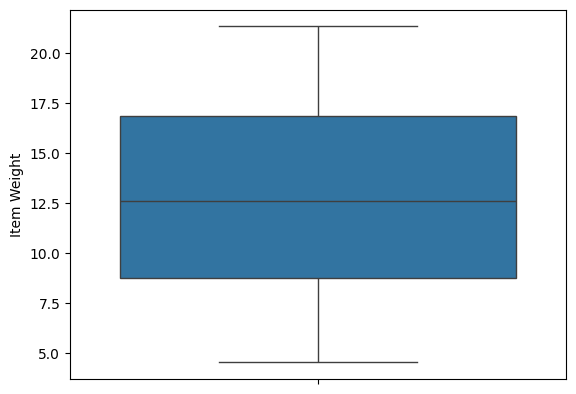

In [7]:
#Verifying the outlier using boxplot
sns.boxplot(df["Item Weight"])

In [8]:
#imputing the null values with mean(average)
df["Item Weight"].fillna(df["Item Weight"].mean(),inplace = True)

<ipython-input-8-066cc7cd219f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item Weight"].fillna(df["Item Weight"].mean(),inplace = True)


In [10]:
# now replacing the values in order in fat content
df['Item Fat Content'] = df['Item Fat Content'].replace("LF", "Low Fat")
df['Item Fat Content'] = df['Item Fat Content'].replace("low fat", "Low Fat")
df['Item Fat Content'] = df['Item Fat Content'].replace("reg", "Regular")


In [12]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


#Viusalization


##Sales & Revenue Analysis#

1️⃣ What are the top-selling item types, and how do they contribute to total sales?



<ipython-input-13-9fc709570ad6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Sales", y = "Item Type", data = item_by_sales, palette = "viridis")


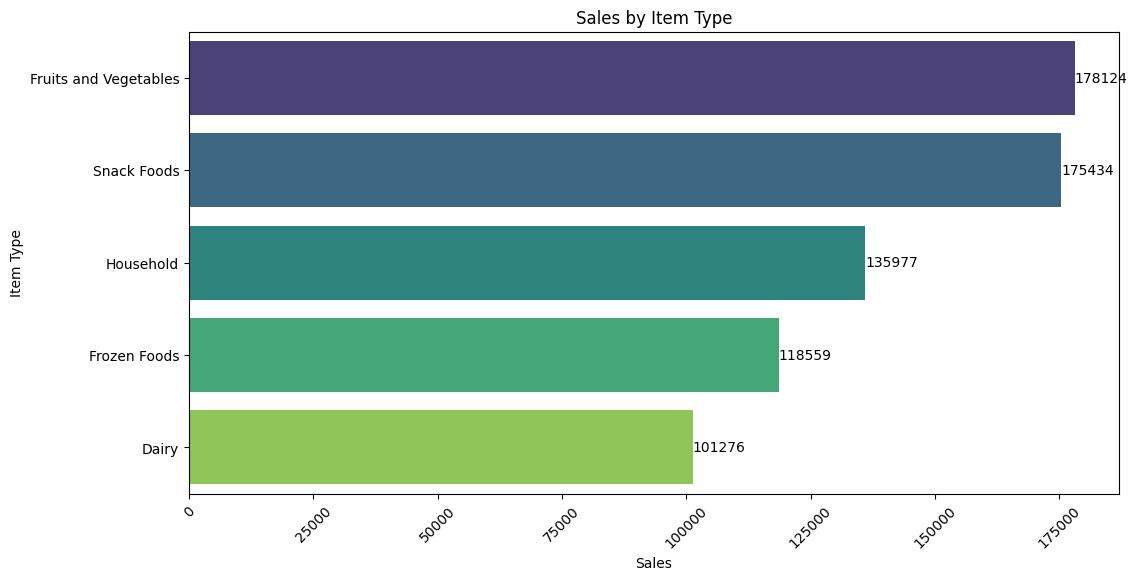

In [13]:
# Group by 'item type' and calculate total sales for each category
item_by_sales= df.groupby("Item Type")["Sales"].sum().reset_index()
item_by_sales =  item_by_sales.sort_values(by ="Sales", ascending=False).head()

#ploting the graph
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = "Sales", y = "Item Type", data = item_by_sales, palette = "viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Sales by Item Type")
plt.xticks(rotation = 45)
plt.show()

2️⃣ Which outlet locations generate the highest and lowest sales, and why?


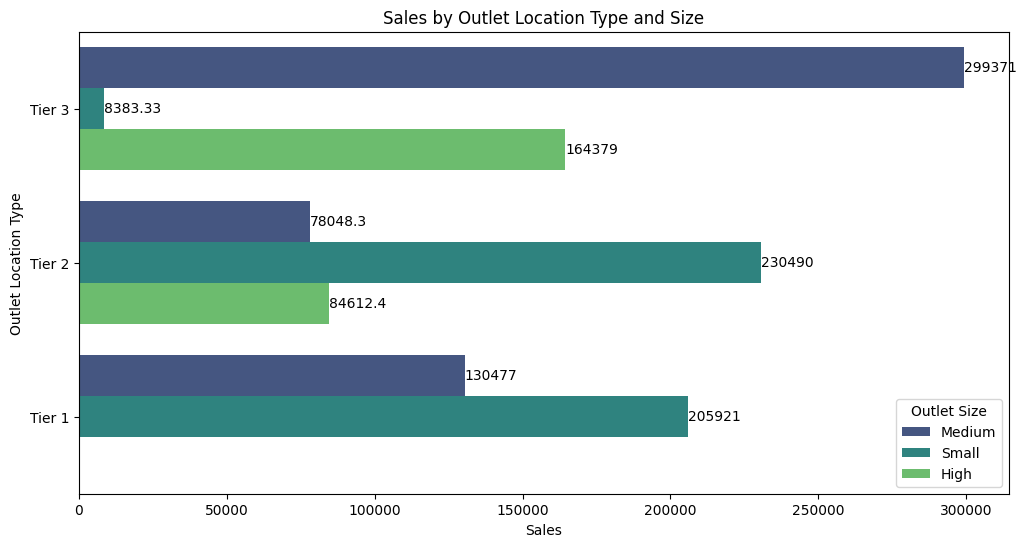

In [14]:
# Group by 'location type ' and calculate total sales for each category
sales_by_location_size = df.groupby(['Outlet Location Type', 'Outlet Size'])['Sales'].sum().reset_index()
sales_by_location_size = sales_by_location_size.sort_values(by = "Sales", ascending=False)

#ploting the bar graph
plt.figure(figsize = (12,6))
ax =sns.barplot(x='Sales', hue='Outlet Size', y='Outlet Location Type', data=sales_by_location_size, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Sales by Outlet Location Type and Size')
plt.show()


3️⃣ How does the outlet establishment year impact sales performance?


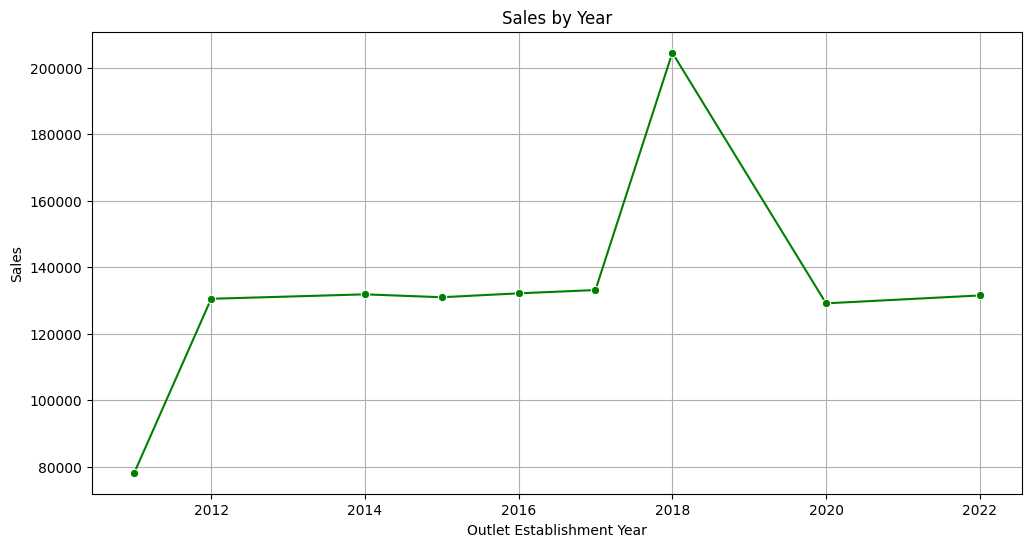

In [15]:
# Group by 'Year' and calculate total sales for each category
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().reset_index()
sales_by_year = sales_by_year.sort_values(by = "Sales", ascending=False)

#ploting the graph
plt.figure(figsize = (12,6))
sns.lineplot(x='Outlet Establishment Year', y='Sales', data=sales_by_year, marker='o', color='g')
plt.title("Sales by Year")
plt.grid(True)
plt.show()

4️⃣ Is there a relationship between item visibility and sales?

In [16]:
# Calculate the correlation between 'Item Visibility' and 'Sales'
correlation = df['Item Visibility'].corr(df['Sales'])
print(f"Correlation between Item Visibility and Sales: {correlation}")

Correlation between Item Visibility and Sales: -0.0013149598375738415


Negative Correlation (Close to -1): A negative correlation would indicate that higher item visibility might correspond to lower sales (this could happen in cases where the most visible items are overstocked and don't sell well).


##Customer & Product Insights


5️⃣ Do certain item fat content categories (e.g., Low Fat, Regular) sell better than others?

<ipython-input-17-c614412d3560>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Sales", y = "Item Fat Content", data = sales_by_fat_content, palette = "viridis")


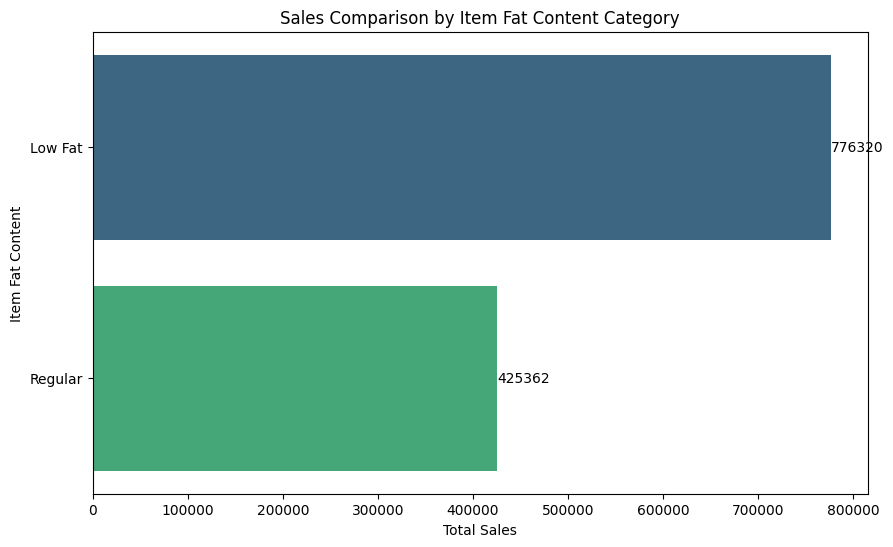

In [17]:
# Group by 'Item Fat Content' and calculate total sales for each category
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum().reset_index()

# Sort by total sales to identify the best-selling categories
sales_by_fat_content = sales_by_fat_content.sort_values(by='Sales', ascending=False)

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = "Sales", y = "Item Fat Content", data = sales_by_fat_content, palette = "viridis")

for container in ax.containers:
    ax.bar_label(container)

plt.title('Sales Comparison by Item Fat Content Category')
plt.xlabel('Total Sales')
plt.ylabel('Item Fat Content')

# Show the plot
plt.show()

6️⃣ How does outlet size (Small, Medium, Large) affect sales performance?

<ipython-input-18-f5c9d9723a96>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales', y='Outlet Size', data=sales_by_outlet_size, palette='viridis')


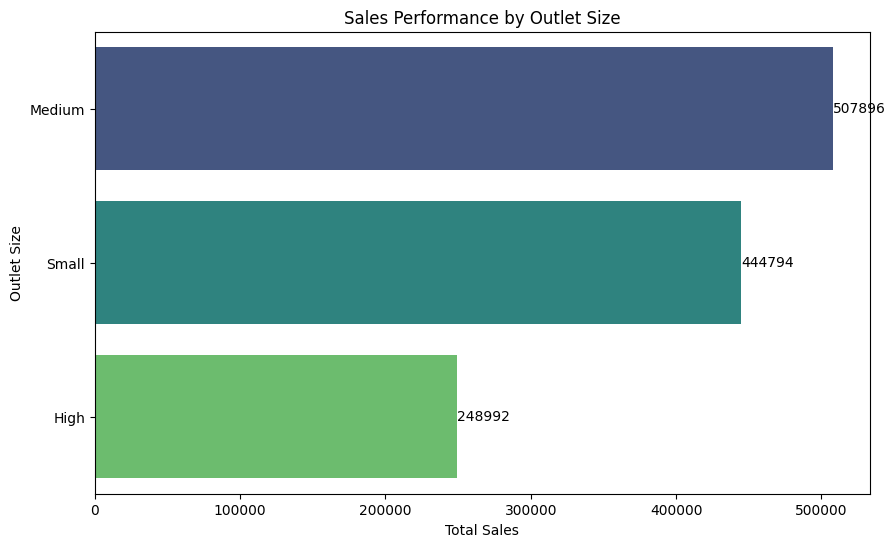

In [18]:
# Group by 'Outlet Size' and calculate total sales for each size
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum().reset_index()

# Sort by total sales to identify the highest performing outlet size
sales_by_outlet_size = sales_by_outlet_size.sort_values(by='Sales', ascending=False)

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sales', y='Outlet Size', data=sales_by_outlet_size, palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

# Add title and labels
plt.title('Sales Performance by Outlet Size')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Size')

# Show the plot
plt.show()


7️⃣ What is the impact of product weight on sales? (e.g., Are lighter products sold more frequently?)

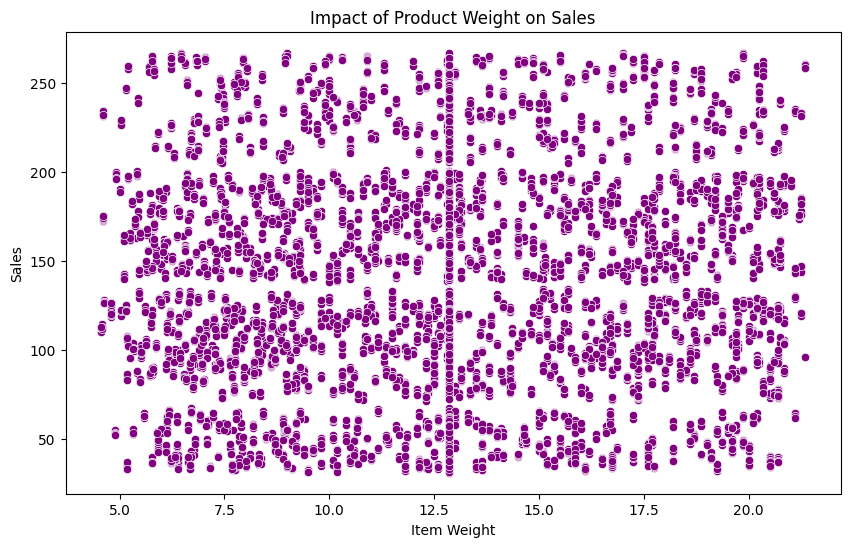

Correlation between Product Weight and Sales: 0.024756083186980044


In [128]:
# Scatter plot to visualize the relationship between 'Item Weight' and 'Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Weight', y='Sales', data=df, color='purple')

# Add title and labels
plt.title('Impact of Product Weight on Sales')
plt.xlabel('Item Weight')
plt.ylabel('Sales')

# Show the plot
plt.show()

# Calculate the correlation between 'Item Weight' and 'Sales'
correlation = df['Item Weight'].corr(df['Sales'])
print(f"Correlation between Product Weight and Sales: {correlation}")


The correlation between Product Weight and Sales is 0.025, which is very close to 0. This indicates that there is no significant relationship between product weight and sales. In other words, product weight does not appear to have a meaningful impact on sales performance in our dataset.

8️⃣ Are there seasonal trends in sales based on outlet type (e.g., Supermarket vs. Grocery Store)?

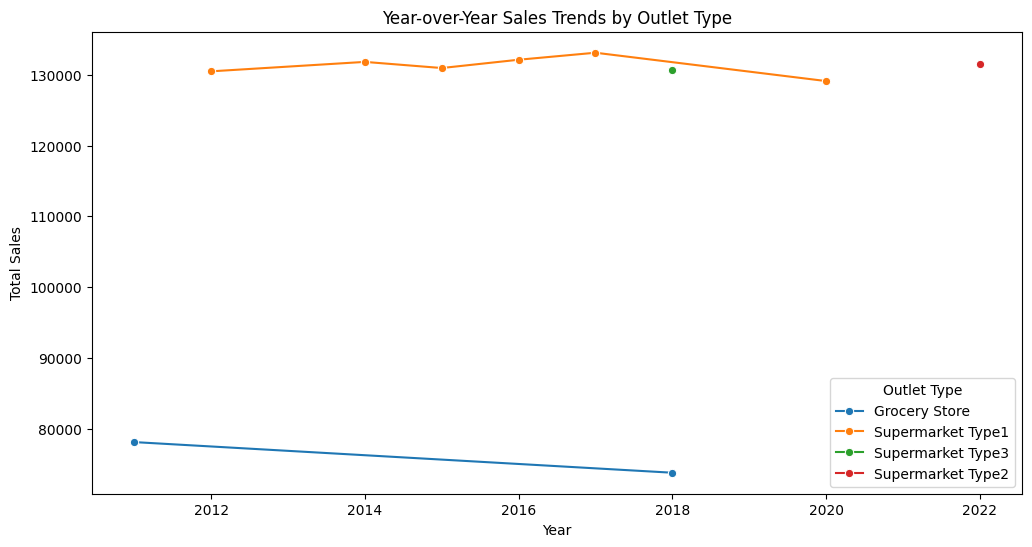

In [148]:
# Group by 'Year' and 'Outlet Type', calculating total sales for each group
sales_by_year_outlet = df.groupby(['Outlet Establishment Year', 'Outlet Type'])['Sales'].sum().reset_index()

# Plot the data using Seaborn (Line plot for year-over-year trends)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Outlet Establishment Year', y='Sales', hue='Outlet Type', data=sales_by_year_outlet, marker='o')

# Add title and labels
plt.title('Year-over-Year Sales Trends by Outlet Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


9️⃣ Do outlets in different locations have different sales trends?

Tier 1 outlets have the highest sales in years where sales were strong, particularly before 2018, but experienced a sharp decline in 2018.
Tier 2 outlets show steady growth over the years, though they have slightly lower sales than Tier 1.
Tier 3 outlets had the lowest sales initially but showed consistent growth over the years and are becoming more competitive with Tier 2 and Tier 1.

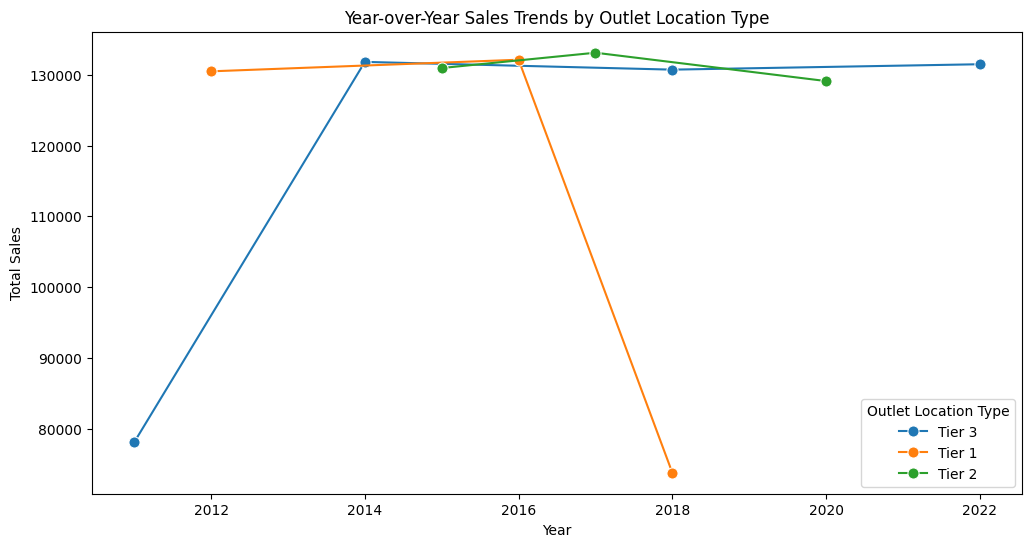

In [172]:
# Group by 'Outlet Establishment Year' and 'Outlet Location Type', calculating total sales
sales_by_location_year = df.groupby(['Outlet Establishment Year', 'Outlet Location Type'])['Sales'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Outlet Establishment Year', y='Sales', hue='Outlet Location Type', data=sales_by_location_year, marker='o', markersize=8)

# Add title and labels
plt.title('Year-over-Year Sales Trends by Outlet Location Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Show the plot
plt.show()

Tier 1 Focus: Investigate the sharp drop in 2018 for Tier 1 outlets. It might be useful to review factors like customer preferences, store management, or competitor actions to understand the decline.
Tier 2 Consistency: Tier 2 outlets could be a good target for expansion, given their consistent growth. They might require improved marketing or inventory strategies to boost performance further.
Tier 3 Potential: Tier 3 outlets show a strong growth trend. It might be worthwhile to focus on scaling these outlets and understand what has led to the increase in sales, whether it's better marketing, product offerings, or location.


🔟 How do customer ratings impact sales, and which products/outlets have the highest-rated items?

In [20]:
# Group by 'Item Type' and calculate the mean of the 'Customer Rating'
rating_product = df.groupby("Item Type")["Rating"].mean().reset_index()
rating_product = rating_product.sort_values(by = "Rating", ascending=False).head()

In [21]:
rating_product

,Item Type,Rating
10,Meat,4.023059
9,Household,3.998681
3,Canned,3.994299
8,Health and Hygiene,3.986154
0,Baking Goods,3.983025


<ipython-input-29-d3648001a220>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(x='Item Type', y='Rating', data=rating_product, palette='viridis')


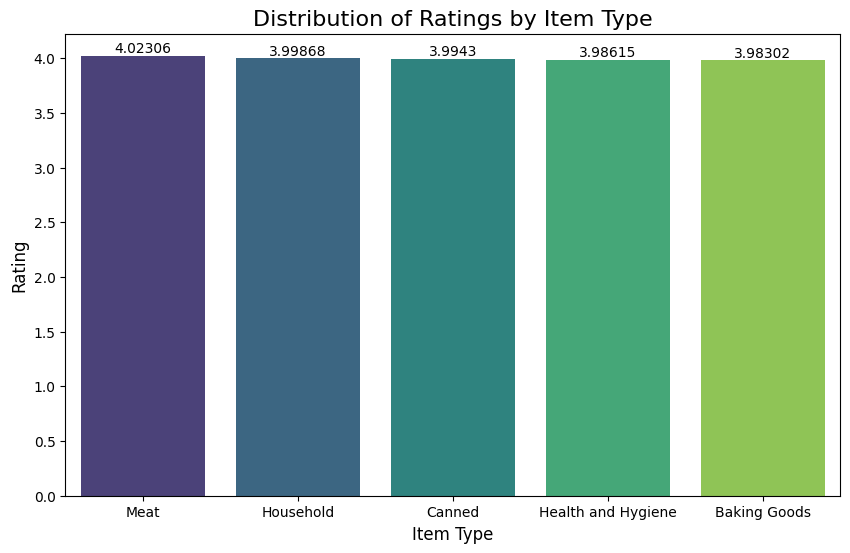

In [29]:
# barplot to visualize the  average ratings for top 5 item type
plt.figure(figsize=(10, 6))
ax =sns.barplot(x='Item Type', y='Rating', data=rating_product, palette='viridis')

for container in ax.containers:
  ax.bar_label(container)
# Add title and labels
plt.title('Distribution of Ratings by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Show the plot
plt.show()